# codecentric.AI Bootcamp
## Praxis: Machine Learning Basics

Willkommen bei der Lektion zu den Grundlagen zu Machine Learning!

Um das Erklärvideo zu diesem Notebook zu laden, führe folgende Zelle aus:


In [1]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/iXZ95iGRMzM', width=850, height=650)

Wir beginnen sehr einfach, um auch diejenigen von euch abzuholen, die noch nicht viel Erfahrung mit Python besitzen. 
Wenn Dir das Kapitel zu einfach erscheint - keine Sorge, im folgenden Kurs wird der Code noch anspruchsvoller ;-).

## Import
Zunächst importieren wir die benötigten Bibliotheken.

- numpy - für eine effiziente Verarbeitung von multidimensionalen Arrays
- matplotlib  - für die Visualisierung unserer Daten

In [2]:
# Funktion, damit die matplotlib Visualisierungen im Jupyter Notebook angezeigt werden (und nicht in einem separaten Fenster)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import math
import random

# Fangen wir mal ganz einfach an

Wir definieren eine **einfache** Funktion und generieren damit ein paar Datenpunkte. Wir verwenden absichtlich ein stark vereinfachtes Beispiel, um die grundlegenden Prinzipien hinter Machine Learning und Deep-Learning einfach zu verdeutlichen. In der Realität sind die Modelle, Features und Algorithmen natürlich komplexer - aber ganz abstrakt betrachtet kann man auch das komplexeste Deep Learning auf die Annäherung einer mathematischen Funktion zurückführen.

In diesem einfachen Beispiel soll die folgende Funktion das Modell sein, welches wir lernen wollen:

$$f(x)=1.5x^2 + 5 $$

Es handelt sich um eine Funktion mit quadratischen Eigenschaften. 

In [3]:
# zunächst definieren wir eine Funktion, die wir annähern wollen
f = lambda x: 1.5*x**2 + 5
num_datenpunkte = 8

Die lambda Schreibweise ist eine "anonyme" Funktion und hilft uns, Funktionen mit wenig Code auszudrücken. Die selbe Funktion kann ebenfalls mit dem folgenden Code definiert werden: `def f(x): return 1.5 * x**2 + 5`

In [4]:
daten = np.array( [(x, f(x)) for x in range(num_datenpunkte)] )

# jetzt geben wir die ersten beiden Tupel aus. Die Notation [:3] könnte man auch als [0:3] schreiben und bedeutet hier: 
# Elemente von 0 bis nicht einschließlich 3
print(daten[:3])

[[ 0.   5. ]
 [ 1.   6.5]
 [ 2.  11. ]]


Die Notation mit `[x for x in something]` steht für eine sogenannte Python List Comprehension. Diese werden wir häufig verwenden und sehen. 
So können wir in einer kompakten Schreibweise Listen, Arrays und Dictionaries erzeugen.

Im Folgenden visualisieren wir die Daten mit Matplotlib. Dabei stellen wir die Parameter für die Achsendarstellung (xlim und ylim) so ein, dass der Ursrpung des Koordinatensystems zu sehen ist.

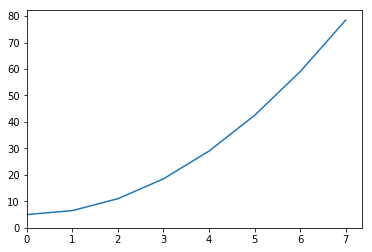

In [5]:
plt.plot(daten[:, 0], daten[:, 1])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [6]:
# nun generieren wir ähnliche Daten mit einer leichten Abweichung
# die Funktion random.randint(-2,2) liefert Zufallszahlen zwischen -2 und 2
noisy_daten = np.array( [(x, f(x) + random.randint(-2,2)*x) for x in range(num_datenpunkte)] )

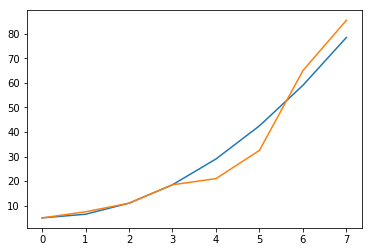

In [7]:
# und nun zeigen wir beide Funktionen in einem Diagramm an
plt.plot(daten[:, 1])
plt.plot(noisy_daten[:, 1])

# Kostenfunktionen: Abweichungen zwischen Vorhersage und Realität messen

Jetzt übertragen wir dieses einfache Beispiel auf ein Problem, welches wir mit Machine Learning lösen wollen.
Die "noisy_daten" sind dabei die Daten, die wir beobachtet haben (also unsere Labels). Im Alltag gibt es keine exakten Modelle - sondern Daten haben immer gewisse Abweichungen. Diese Daten könnten also zum Beispiel unsere Verkaufszahlen oder Daten eines Sensors sein.

Die Funktion f(x) ist dabei das Modell, das wir lernen wollen. Also das Prinzip hinter diesen Daten. (Normalerweise kennen wir dieses zugrunde liegende Modell natürlich nicht, sondern müssen es "lernen")

Ein einfacher Ansatz wäre nun, dass man einfach ein paar Modelle ausprobiert und versucht zu messen, wie gut dieses Modell zu unseren Labels passt. Um dies messen zu können, verwenden wir Kostenfunktionen. Bei Machine Learning Verfahren macht man genau das gleiche - man probiert verschiedene Modelle und sogenannte Hyperparameter aus und misst deren Ergebnisse. Natürlich gibt es hier inzwischen sehr clevere Verfahren, wie man möglichst schnell und zielführend zu einem "optimalen" Modell kommt - aber dazu kommen wir später. Für den Beginn reicht es zu verstehen, dass wir  verschiedene Einstellungen "ausprobieren" und vergleichen können.

In [8]:
# einfache Fehlerfunktion
fehler = lambda x, y: abs(x - y)

gesamt_fehler = 0

# für jeden Datenpunkt wird die Abweichung zwischen Modell und noisy_daten berechnet
for i in range(num_datenpunkte):
    e = fehler(daten[i, 1], noisy_daten[i, 1])
    print("Abweichung bei x={0} ist: {1}".format(i, e))
    gesamt_fehler += e
    
print("Fehler insgesamt: {}".format(gesamt_fehler))

Abweichung bei x=0 ist: 0.0
Abweichung bei x=1 ist: 1.0
Abweichung bei x=2 ist: 0.0
Abweichung bei x=3 ist: 0.0
Abweichung bei x=4 ist: 8.0
Abweichung bei x=5 ist: 10.0
Abweichung bei x=6 ist: 6.0
Abweichung bei x=7 ist: 7.0
Fehler insgesamt: 32.0


### Berechnung derselben Fehlerfunktion mit Hilfe von numpy

In dem obigen Code-Beispiel kann man sehr gut nachvollziehen, wie der Fehler berechnet wird. Für die Verarbeitung von großen Datenmengen sind Schleifen (in diesem Fall die for-Schleife) aber ungeeignet, da deren Ausführung eine hohe Berechnungszeit erfordert - sie sind schlichtweg zu langsam. 

Deshalb wird im Bereich Machine Learning sehr viel mit `numpy` gearbeitet. Mit numpy kann man hocheffizient Berechnungen auf sehr großen Arrays machen. Die gleiche Berechnung des Fehlers wie oben können wir mit numpy wie folgt durchführen:

In [9]:
gesamt_fehler_numpy = np.sum(abs( daten[:, 1] - noisy_daten[:, 1]))

In [10]:
print(gesamt_fehler_numpy)

32.0


Zur Verdeutlichung generieren wir nun einmal 10 Millionen Datenpunkte und vergleichen die Laufzeit bei der Fehlerberechnung.

In [11]:
many_datapoints = 10000000
numpy_1_big = np.random.rand(many_datapoints)
numpy_2_big = np.random.rand(many_datapoints)

In [12]:
%%time

gesamt_fehler_big = 0

for i in range(many_datapoints):
    e = fehler(numpy_1_big[i], numpy_2_big[i])
    gesamt_fehler_big += e
    
print("MAE Big Arrays: ", gesamt_fehler_big/many_datapoints)

MAE Big Arrays:  0.33324121853058014
CPU times: user 7.66 s, sys: 0 ns, total: 7.66 s
Wall time: 7.68 s


In [13]:
%%time

gesamt_fehler_numpy_big = np.sum(abs(numpy_1_big - numpy_2_big))

print("MAE Big Arrays: ", gesamt_fehler_numpy_big/many_datapoints)

MAE Big Arrays:  0.33324121853062755
CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 64 ms


Wie zu sehen ist, ist die Berechnung mit numpy um ein Vielfaches schneller.

## Die Fehlerfunktion als Metrik zur Evaluierung verschiedener Modelle

Wir können nun mit der Hilfe der Fehlerberechung die Leistung verschiedener Modelle vergleichen. Dazu definieren wir jetzt einfach irgendein weiteres Modell und messen bzw. vergleichen die Fehler.

In [14]:
lineares_modell = lambda x: 2*x + 3

andere_daten = np.array( [(x, lineares_modell(x)) for x in range(num_datenpunkte)] )

gesamt_fehler_numpy_andere = np.sum(abs( andere_daten[:, 1] - noisy_daten[:, 1]))
print("Fehler anderes Modell ", gesamt_fehler_numpy_andere)
print("(zum Vergleich: {0})".format(gesamt_fehler_numpy))

Fehler anderes Modell  166.0
(zum Vergleich: 32.0)


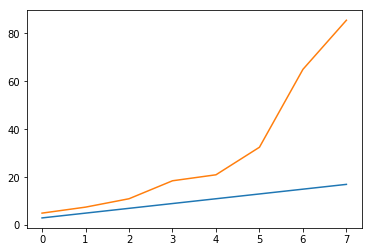

In [15]:
# hier noch eine Visualisierung mit dem linearen Modell
plt.plot(andere_daten[:, 1])
plt.plot(noisy_daten[:, 1])

### Fazit:

- Durch die Ermittlung des "gesamten Fehlers" können wir die beiden Modelle einfach miteinander vergleichen.
- Wir sehen, dass der Fehler beim ersten Modell geringer ist als beim zweiten.
- In der Visualisierung können wir vermuten, dass unser lineares Modell hier "zu einfach" ist und nicht unsere Daten repräsentieren kann. Wobei man bei diesem Ausschnitt noch nicht genau sieht, dass die Daten nicht linear sind.

Aber wir wollen ja beim Machine Learning nicht manuell verschiedene Modelle und Parameter ausprobieren.
Bei diesem einfachen Beispiel ist das zwar noch möglich - in der Praxis sind Modelle aber viel komplexer und lassen sich nicht mehr intuitiv bestimmen. Dennoch sind die Prinzipien die selben - es geht darum, Parameter "auszuprobieren" und den Fehler zu messen. Mit Hilfe von Kostenfunktionen lassen sich effiziente Algorithmen implementieren, welche die Parameter eines Modells iterativ annähern. Wir haben in diesem Beispiel die Summe der absoluten Fehler zwischen dem Modell und den Labels verwendet. Diese wird natürlich immer größer, je mehr Datenpunkte wir "testen". Daher kann man diesen noch durch die Anzahl der Datenpunkte teilen und erhält so eine einfache Kostenfunktion: den durchschnittlichen absoluten Fehler, auf Englisch **"Mean Absolute Error"** (MAE) bezeichnet.



In [16]:
MAE_modell_1 = gesamt_fehler_numpy / num_datenpunkte
MAE_modell_2 = gesamt_fehler_numpy_andere / num_datenpunkte
print(MAE_modell_1, MAE_modell_2)

4.0 20.75


Die Formel für den MAE lautet:

$$MAE(X, f)=\frac1m \sum_{i=1}^m|f(x_i) - y_i|$$

- m ist dabei die Anzahl der Datenpunkte
- X ist ein "Array" mit bekannten Features und Labels (in diesem vereinfachten Fall sind die Features einfach x=1, 2, 3... etc.)
  - also zum Beispiel x1 = (3, 5, 8) <- Features
  - und y1 = (3) <- Label
- f ist unser Modell bzw. die Vorhersagefunktion
- y sind die Labels 

# Generalisieren vs. Over- / Underfitting

Um besser zu verstehen, was Overfitting bedeutet, versuchen wir absichtlich ein "overfitted" Modell zu erstellen.
Wir ermitteln eine Funktion, die möglichst durch alle unsere Trainingspunkte läuft. Dazu berechnen wir ein Polynom 7. Grades mit Hilfe von `numpy.polyfit`:

In [17]:
x = noisy_daten[:, 0]
y = noisy_daten[:, 1]

p = np.polyfit(x, y, 7)
f_poly = np.poly1d(p)

Die resultierende Funktion mit Polynom 7. Grades ist hier dargestellt:

In [18]:
print(f_poly)

          7          6     5         4         3         2
0.008333 x - 0.2583 x + 3 x - 16.62 x + 45.99 x - 58.62 x + 29 x + 5


Mit dieser Funktion berechnen wir nun einige Datenpunkte und visualisieren diese anschließend:

In [19]:
# np.linspace erzeugt hier 100 Datenpunkte zwischen dem ersten und dem letzten x Wert
x_poly = np.linspace(x[0], x[-1], 100)
# mit diesen x Werten berechnen wir den Verlauf der Funktion
y_poly = f_poly(x_poly)

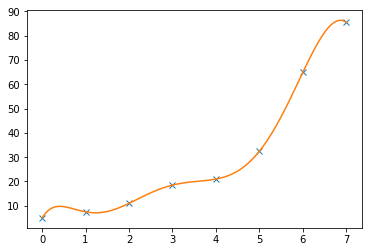

In [20]:
# und jetzt visualisieren wir den Verlauf und markieren die eigentlichen Labels mit einem "x"
plt.plot(x, y, 'x', x_poly, y_poly)

Wir sehen schon, dass die Funktion genau durch die x Punkte verläuft - d.h. es ist zu erwarten, dass unser Fehler sehr klein ist. Zur Kontrolle berechnen wir den Fehler:

In [21]:
overfitted_daten = np.array( [(x, f_poly(x)) for x in range(num_datenpunkte)] )

In [22]:
gesamt_fehler_overfitted = np.sum(abs( overfitted_daten[:, 1] - noisy_daten[:, 1]))
print("Mean Absolute Error {0:.12f}".format(gesamt_fehler_overfitted/num_datenpunkte))

Mean Absolute Error 0.000000000007


Der Fehler des overfitting Modells ist geringer (nahe 0) als der von unserem idealen Modell - **aber nur im Bereich von unseren Trainingsdaten (den Datenpunkten)**. Das Modell hat qausi die Datenpunkte auswendig gelernt und nicht das Konzept hinter den Daten verstanden.

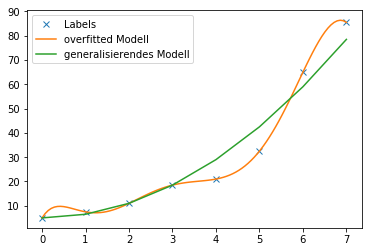

In [23]:
plt.plot(x, y, 'x', x_poly, y_poly)
plt.plot(daten[:, 1])
plt.legend(["Labels", "overfitted Modell", "generalisierendes Modell"])

Betrachten wir nun einen Datenpunkt, den das Modell nicht während des Trainings "gesehen" hat, sehen wir, wie schlecht das Modell trotz des geringen Fehlers ist:

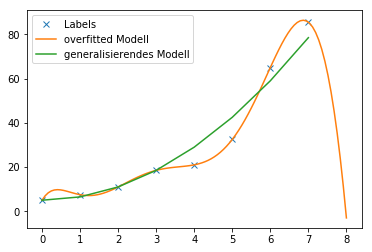

In [24]:
# wir erzeugen nochmal Daten, gehen aber über die Trainingsdaten hinaus (+1)
x_poly = np.linspace(x[0], x[-1] + 1, 100)
y_poly = f_poly(x_poly)
plt.plot(x, y, 'x', x_poly, y_poly)
plt.plot(daten[:, 1])
plt.legend(["Labels", "overfitted Modell", "generalisierendes Modell"])

### Fazit:

Overfitting kann bedeuten, dass ein Fehler zwar sehr klein wird, sich aber ein Modell trotzdem nicht eignet, denn 
- es trifft nur auf den Trainingsdaten gute Vorhersagen
- es generalisiert nicht, trifft also auf neuen Datenpunkten / Beobachtungen schlechte Vorhersagen

Im Gegensatz dazu bedeutet "Underfitting", dass ein Modell eine zu einfache Funktion erlernt hat. Um Underfitting zu verdeutlichen, erstellen wir im folgenden Beispiel eine lineare Funktion, bei der wir wissen, dass diese niemals die quadratischen Eigenschaften unserer Daten abbilden kann:

In [25]:
# unsere Funktion soll ungefähr durch diese Punkte verlaufen:
(x1, y1), (x2, y2) = noisy_daten[0], noisy_daten[-1]
print(x1, y1, x2, y2)

# daraus folgt das Modell: 
f_underfitting = lambda x: ( (y2-y1)/x2 ) * x + y1

0.0 5.0 7.0 85.5


In [26]:
underfitted_daten = np.array( [(x, f_underfitting(x)) for x in range(num_datenpunkte)] )

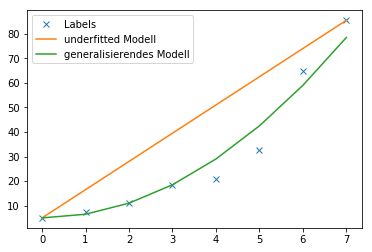

In [27]:
plt.plot(x, y, 'x', underfitted_daten[:, 1])
plt.plot(daten[:, 1])
plt.legend(["Labels", "underfitted Modell", "generalisierendes Modell"])

### Fazit: 

Auch hier sehen wir, dass der Fehler im Bereich der Trainingsdaten nicht sehr groß sein wird. Man kann sich aber leicht vorstellen, dass die Abweichungen für größere Werte von x sehr groß werden. Das "zu einfache" Modell wird niemals in der Lage sein, unsere fiktiven Daten mit quadratischen Eigenschaften über einen großen Wertebereich gut vorherzusagen.

# Daten splitten und Modelle messen

Was kann man nun gegen Overfitting und Underfitting unternehmen? Und vor allem: wie merkt man, wie es um sein aktuelles Modell bestellt ist? Bei unserem einfachen Beispiel lässt sich das noch ganz gut visualisieren und intuitiv bewerten - in der Praxis sind dafür die Modelle aber meist zu komplex.

Im Prinzip geht man in der Praxis wie folgt vor:

- Teile die Daten auf in Trainings-, Validierungs- und Testdaten (engl. training set, validation set, test set)
- Trainiere dein Modell nur auf den Trainingsdaten
- Messe den Fehler auf den Trainingsdaten -> fehler(train)
- nach einigen Durchläufen: Messe den Fehler auf dem Validierungsdatensatz (also auf Daten, die das Modell nicht "kennt"). In diesem Schritt wird nur der Fehler berechnet und es werden keine Parameter angepasst.

Durch einen Vergleich der Werte fehler(train) und fehler(val) kann man bewerten, wie gut oder schlecht ein Modell generalisiert und anschließend Hyperparameter verändern, um zu überprüfen, ob bei anderen Konfigurationen bessere Ergebnisse zustande kommen. 

Der Testdatensatz kann genutzt werden, um nach der Optimierung eines Modells eine ungeschönte Qualitätsaussage über das Modell zu machen. Die Idee ist es, nur ein einziges mal Prognosen auf den Testdaten durchzuführen, um die Leistungsfähigkeit eines Modells zu messen. Eine weitere Optimierung nach diesem Durchlauf ist nicht sinnvoll, da man das Modell ggfs. zugunsten bestimmter Charakteristiken optimiert, die nur in den Testdaten existieren, aber nicht generell in den zu erwartenden Daten bestehen. Es wäre quasi ein Selbstbetrug und daher nicht aussagekräftig.

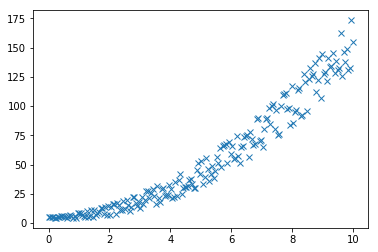

In [28]:
# jetzt brauchen wir etwas mehr Daten als vorher, damit wir was zum aufteilen haben
# wir generieren zunächst 200 x-werte zwischen 0 und 10
num_x = num_x = 200
x_werte = np.linspace(0, 10, num_x)

# nun erzeugen wir die Daten wieder mit einer leichten Abweichung zu unserem Modell
mehr_daten = np.array( [(x, f(x) + random.randint(-2,2)*x) for x in x_werte] )

plt.plot(mehr_daten[:,0], mehr_daten[:,1], "x")

In [29]:
# wir mischen die Daten durch, damit die Daten zufällig verteilt sind
np.random.shuffle(mehr_daten)

# wir definieren einen Split bei 90 % (also 90 % Training, 10 % Validation). Üblich sind Werte zwischen 80-90% je nach Daten.
split = int(num_x * (0.9))

# jetzt splitten wir die Daten auf - mit numpy slicing ganz einfach:
train, val = mehr_daten[:split,:], mehr_daten[split:,:]

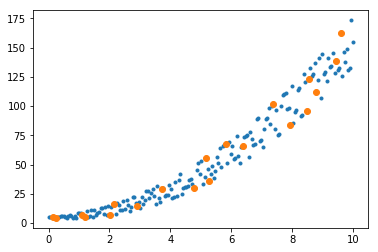

In [30]:
# Anzeige der Trainingsdaten kleinere blaue Punkte
plt.plot(train[:, 0], train[:, 1], ".")
# Anzeige der Validierungsdaten als größere orangene Punkte
plt.plot(val[:, 0], val[:, 1], "o")

Mit einem Modell und einer Fehlerfunktion kann man nun den Fehler für die Trainingsdaten und für die Validierungsdaten berechnen und miteinander vergleichen. Hier kommt es vor allem auch auf den Trend der Werte in mehreren Trainingsrunden an.

Am Anfang ist zu erwarten, dass sowohl fehler(train) als auch fehler(val) mehr oder weniger gleichmäßig kleiner werden. Dies bedeutet das Modell wird besser bzw. "lernt" etwas. Erreicht man dann einen Punkt, wo fehler(train) weiterhin kleiner wird aber fehler(val) gleich bleibt oder sogar größer wird beginnt das Modell zu overfitten. An dieser Stelle lernt das Modell nicht mehr das Konzept der Trainingsdaten, sondern die Traingsdaten selbst.

Schauen wir uns einen fiktiven Trainingsverlauf an:

| Trainingsrunde | fehler(train) | fehler(val)    |
|----------------|---------------|----------------|
|   1            | 17,4          | 20,3           |
|   2            | 14,4          | 17,2           |
|   3            | 8,4           | 10,5           |
|   4            | 2,4           |  4,1           |
|   5            | 1,4           |  6,1           | 
|   6            | 0,4           |  8,2           |

Hier sehen wir, dass ab Runde 5 ein Overfitting beginnt. fehler(train) fällt weiter deutlich während fehler(val) wieder steigt. Das Modell kann also auf unbekannten Daten verhältnismäßig schlechter vorhersagen als auf bekannten Daten. Was wiederum bedeutet, dass es nicht mehr so gut generalisiert. Das ist in der Regel ein guter Zeitpunkt, um mit dem Training aufzuhören. Wenn man diesen Punkt nie erreicht, dann bedeutet das wahrscheinlich, dass ein Modell zu einfach ist.

An dieser Stelle führt uns unser vereinfachtes Beispiel nicht mehr weiter (wir müssten zu viel selbst implementieren). Ab hier werden wir uns mit realen Datensätzen und mit Machine Learning Frameworks auseinander setzen. Die beschriebenen Konzepte werden uns häufig wieder begegnen.

# Hands On! mit einer Bildklassifikation 

Okay, das war jetzt viel Theorie ohne konkreten Praxisbezug ... das wollen wir nun ändern. Wir starten gleich richtig durch. In diesem Abschnitt laden wir einen Bilderdatensatz und klassifizieren diese. Was klassifizieren genau bedeutet, erkläre ich euch in einem anderen Kapitel. Wir verwenden als Frameworks `Keras`, `TensorFlow`. Als Machine Learning Verfahren verwenden wir neuronale Netze. Was das genau bedeutet sei an dieser Stelle unwichtig - wir werden aber die einfachen Prinzipien von vorher wiederfinden.

An dieser Stelle ist es wichtig, zu verstehen, dass die Prinzipien von unserem stark vereinfachten Beispiel auch bei komplexen Deep Learning mit neuronalen Netzen ebenso gültig sind. Es funktioniert ganz ähnlich - nur die mathematischen Funktionen sind komplexer und es gibt viel mehr Parameter. Diese Komplexität wird für uns als Nutzer aber durch einfach anzuwendende Frameworks abstrahiert.

Zuerst importieren wir Funktionen aus Keras, die wir im Folgenden benötigen.

In [31]:
from keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [42]:
fruit_list = ["Kiwi", "Banana", "Plum", "Apricot", "Avocado", "Cocos", "Clementine", "Mandarine", "Orange",
                "Limes", "Lemon", "Peach", "Raspberry", "Strawberry", "Pineapple", "Pomegranate"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
train_image_files_path = "/data/fruits-360/Training/"
valid_image_files_path = "/data/fruits-360/Test/"

In [33]:
beispiel_bilder = !find $train_image_files_path -type f

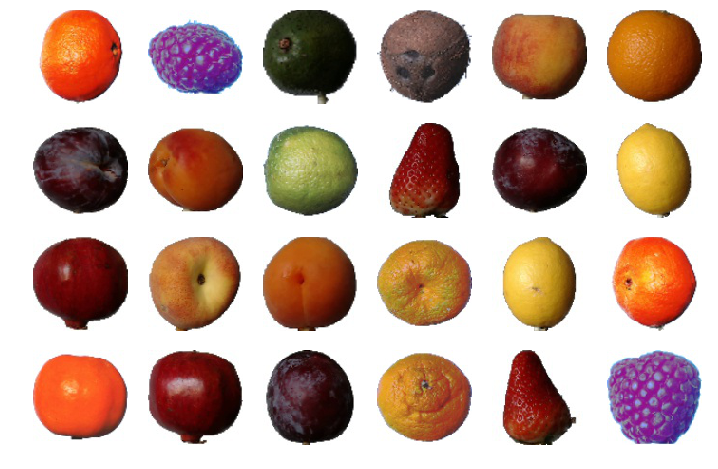

In [34]:
num_beispiel_bilder = 24
beispiel_bilder = random.sample(beispiel_bilder, num_beispiel_bilder)

fig = plt.figure(figsize=(12,8))

for i in range(num_beispiel_bilder):
    fig.add_subplot(4, 6, i + 1)
    plt.axis('off')
    img = plt.imread(beispiel_bilder[i])
    plt.imshow(img)

In [43]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255 #,
)

valid_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
        train_image_files_path,
        target_size = (img_width, img_height),
        class_mode = 'categorical',
        classes = fruit_list,
        seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
        valid_image_files_path,
        target_size = (img_width, img_height),
        class_mode = 'categorical',
        classes = fruit_list,
        seed = 42)

Found 7709 images belonging to 16 classes.
Found 2428 images belonging to 16 classes.


In [44]:
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

batch_size = 32
epochs = 10

7709 2428


### Wir definieren die Architektur des neuronalen Netzes

In [45]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [46]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

### Wir trainieren das Modell

Das kann ein wenig dauern, je nachdem wie viel Power dein Computer hat, musst du dich hier ein wenig gedulden.

In [ ]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/10
240/240 [==============================] - 59s 246ms/step - loss: 1.1257 - acc: 0.6453 - val_loss: 0.2422 - val_acc: 0.9492
Epoch 2/10
239/240 [============================>.] - ETA: 0s - loss: 0.2007 - acc: 0.9378

### Wir messen die Genauigkeit des Modells (engl. Accuracy)
Die Definition von Genauigkeit lautet wie folgt:
- Genauigkeit = Anzahl richtiger Prognosen / Anzahl aller Prognosen

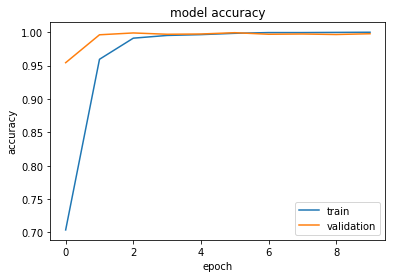

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')

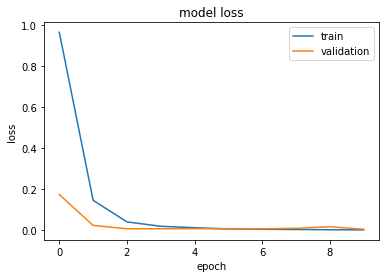

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

## Fazit:

Mit ein paar Zeilen Code haben wir:

- ein Datensatz mit Labels geladen
- eine mathematische Funktion mit vielen Parametern definiert (in unserem Fall ein neuronales Netz)
- eine Kostenfunktion definiert (in dem Fall loss = categorical_crossentropy)
- iterativ ein Modell trainiert (mit model.fit())
- verschiedene Modelle miteinander verglichen (Auswertung von Training Accuracy und Validation Accuracy)

### Resultat:

Die Validation Accuracy liegt bei > 99,9%. Das bedeutet, dass mit diesem einfachen Code und ein paar Minuten Trainingszeit wir eine Bildklassifikation durchführen konnten. Von unseren knapp 3000 Bildern aus dem Validation Set werden über 99,9% davon korrekt in eine von 81 Klassen einsortiert.

Dieses Beispiel ist einfach übertragbar auf alle möglichen Bereiche. Auf genau die gleiche Art und Weise könnte man:

- fehlerfreie von fehlerhaften Bauteilen unterscheiden
- medizinische Bilder auswerten
- Objekte in Qualitätsstufen einsortieren
- Fotos automatisch kategorisieren

... man muss "nur" die Bilder und die Labels bereitstellen.

### Nun wünsche ich Dir viel Erfolg bei den Übungsaufgaben :-)